In [1]:
# Checks:
!which python

/home/haruyaishikawa/anaconda3/envs/chainer/bin/python


In [2]:
# general
import cv2
import math
import time
import numpy as np
from pprint import pprint
import sys
from matplotlib import pyplot as plt

# chainer
import chainer

In [3]:
sys.path.insert(0, '../openpose')  # append path of openpose
sys.path.insert(0, '../openpose/data')  # append path of data

In [4]:
from pose_detector import PoseDetector, draw_person_pose
from entity import params, JointType

## Flow

In [5]:
# Chainer config
chainer.config.enable_backprop = False
chainer.config.train = False

chainer.config.show()

autotune              False
cudnn_deterministic   False
debug                 False
enable_backprop       False
keep_graph_on_report  False
lazy_grad_sum         False
train                 False
type_check            True
use_cudnn             auto
use_cudnn_tensor_core auto
use_ideep             never


In [6]:
# load model
# Defaults:
#    arch       : Need to be set
#    weight_file: Need to be set
#    device     : gpu=0
#    precise    : False

pose_detector = PoseDetector('posenet', '../openpose/models/coco_posenet.npz', device=0, precise=True)

print("success!")

Loading the model...
success!


In [7]:
# helper functions:

def show_rgb(img):
    '''OpenCV visualization in Jupyter Notebook'''
    # convert to rgb format
    rgb_img = img[:,:,::-1]
    %matplotlib notebook
    plt.imshow(rgb_img, interpolation='none')


height:  480 width:  640


<IPython.core.display.Javascript object>


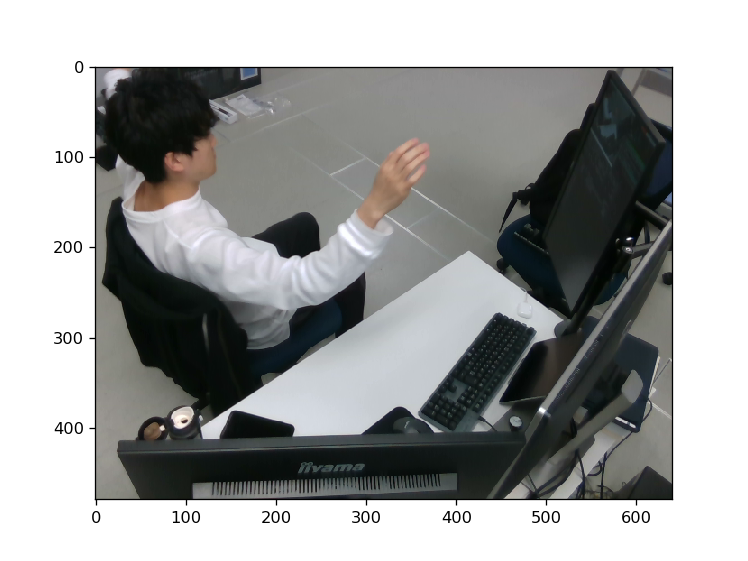

In [25]:
rgb_raw = "../../data/rgb/00100.png"
d_raw = "../../data/depth/00100.png"

# read image
img = cv2.imread(rgb_raw)

h, w = img.shape[:2]
print("height: ", h,"width: ", w)
    
show_rgb(img)
    
# inference
poses, scores = pose_detector(img)

In [23]:
pprint(poses)

array([[[132.,  81.,   2.],
        [ 80., 169.,   2.],
        [115., 195.,   2.],
        [246., 234.,   2.],
        [  0.,   0.,   0.],
        [ 40., 152.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 309.,   2.],
        [261., 274.,   2.],
        [  0.,   0.,   0.],
        [176., 322.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [121.,  75.,   2.],
        [  0.,   0.,   0.],
        [ 87., 103.,   2.],
        [  0.,   0.,   0.]]])


<IPython.core.display.Javascript object>


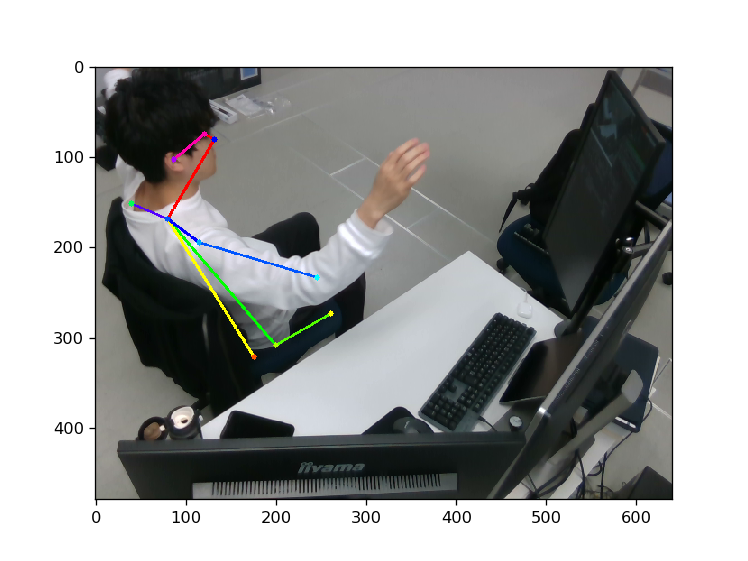

In [26]:
# draw and connect the joints in pose
img = draw_person_pose(img, poses)
show_rgb(img)

In [11]:
# JointType
for i, joint in enumerate(JointType):
    print(i, joint)

0 JointType.Nose
1 JointType.Neck
2 JointType.RightShoulder
3 JointType.RightElbow
4 JointType.RightHand
5 JointType.LeftShoulder
6 JointType.LeftElbow
7 JointType.LeftHand
8 JointType.RightWaist
9 JointType.RightKnee
10 JointType.RightFoot
11 JointType.LeftWaist
12 JointType.LeftKnee
13 JointType.LeftFoot
14 JointType.RightEye
15 JointType.LeftEye
16 JointType.RightEar
17 JointType.LeftEar


In [61]:
# analysis:
pose = poses[0]
print(len(JointType))

# how to get particular joints location
# output is an array: [x, y, score] 
# x, y are pixel locations

# example:
pose[JointType.Nose]

18


array([132.,  81.,   2.])

#TODO: what should the joint data be for storage?

1. save the array by itself
    - all images that I'll use is VGA formats
    - 

2.

In [28]:
import open3d as o3

In [33]:
# dataset

color = o3.read_image(rgb_raw)
depth = o3.read_image(d_raw)

In [35]:
d_img = np.asarray(depth)
print(d_img)
print(d_img.dtype)
print(d_img.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint16
(480, 640)


In [37]:
rgbd_image = o3.create_rgbd_image_from_color_and_depth(color, depth)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [42]:
pcd = o3.create_point_cloud_from_rgbd_image(rgbd_image, o3.PinholeCameraIntrinsic(
    o3.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# %matplotlib inline
#o3.draw_geometries([pcd])
arr = np.asarray(pcd.points)

In [43]:
arr.shape

(193578, 3)

<IPython.core.display.Javascript object>


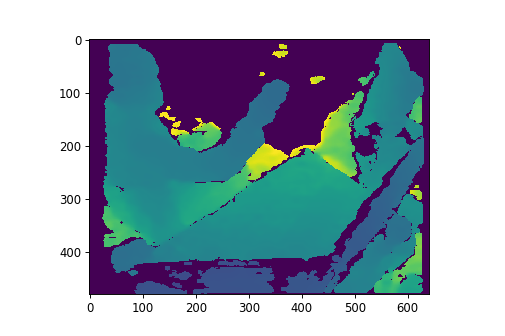

In [47]:
%matplotlib notebook
plt.imshow(rgbd_image.depth)

In [50]:
neck = pose[JointType.Neck]
print(neck)
neck.dtype

[ 80. 169.   2.]


dtype('float64')

In [54]:
x = int(neck[0])
y = int(neck[1])

type(rgbd_image.depth)

open3d.Image

In [59]:
d = rgbd_image.depth

d1 = np.array(d)
d1[y][x]

0.0